# Projet CreSword Game

HOAREAU Cédric (40002628) / FONTAINE Emmanuel (40000594) /  ~~RIVIERE Thomas (40001950) / GAËTAN Savigny (40003344)~~

#### Pour ce projet nous allons utiliser le framework Django pour créer un site Web

# Idées de Projets

### Concepte

-on avait eu comme idée de créer un site sur lequel on pouvait stocker des images et y associer une documentation.\
-on avait eu comme idées aussi d'un site du stockage multimédia en ligne.\
-puis on a eu comme idées un site de référence de jeux vidéo à but non lucratif.

### Sujet

On a prévu de créer un site qui référence des jeux vidéo qu'on connaît tout en proposant des informations sur ces même jeux vidéo. Sur ce même on proposera aussi éventuellement un forum d'échange.

## Déscription de Django

Django est Framework de Python qui a pour but de simplifier le développement web.\
Ce Framework a été a l'origine de beaucoup de sites connus.

- ## Instalation & creation d'un nouveau projet

- ## Verifiction

Pour verifier que Django est bien installé, il suffit que dans un executable python d'importer Django.

In [2]:
import django
print(django.get_version())

3.2


## Création d'un Nouveau Projet

Pour la création d'un nouveau projet il faut entrer dans un terminal la commande suivante :

Vous devez éviter de nommer vos projets en utilisant des noms réservés de Python ou des noms de composants de Django.

Si vous passez ces étapes votre projet devrait ressembler à l'exemple suivant :

#### Lancer le projet


Pour vérifier que votre projet Django fonctionne, lancer le serveur web avec la commande suivante dans le repertoir ou se trouve manage.py :

##### Pour toutes les commandes il faut s'assurer d’être dans le même répertoire que manage.py. Tous les arguments de manage.py nous pouvons afficher son utilisation avec la commande suivante :

Avec tous les arguments suivants :

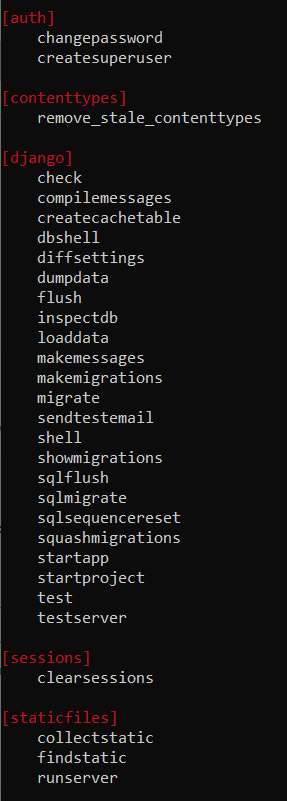

 Après avoir verifier que le projet fonctionne correctement, Django nous donne la possibilité de gérer l'administration du site web grace à ça rubrique Admin. 

Pour cela nous pouvons crée un utilisateur admin avec cette commande:

Dans notre projet l'admin nous a servi à enregistrer les différentes caractéristiques des class objets que nous avons créés (plus de detail par la suite)

## Suite à cela nous avons créer notre première application : home

##### C'est dans cette application que nous aurons la page d'accueil ainsi que les autres pages liées aux affiches.

Avec la commande suivante :

Cela va créer un répertoire home, qui est structuré de la façon suivante :

C'est dans ce répertoire que l'on va créé nos models et nos templates(page html)

Les applications web Django regroupent généralement le code qui gère chacune de ces étapes dans des fichiers séparés :

                                                 Schéma 1

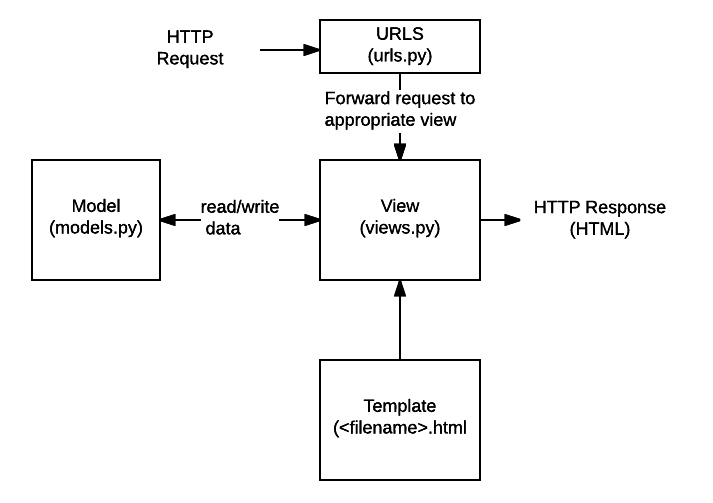

##### Une fois cela fait, nous avons modifié quelques paramètres qui se trouvent dans le fichier **settings.py**, là où se trouve tous les réglages de Django.

Dans un premier temps on a ajouté l'application que nous avons créée dans la variable : INSTALLED_APPS

On a rajouté la ligne suivante : 'home.apps.HOMEConfig'

##### Suite à cela il faut utiliser deux commandes très importante :
###### python manage.py makemigrations
###### python manage.py migrate

Makemigrations permet de dire à Django que vous avez apporté des modifications dans les fichiers et migrate va vous permettre de créer une table de données contenant vos nouvelles informations (il est important d'exécuter makemigrations avant migrate).

### Creation du model

In [ ]:
from django.db import models

class affiche(models.Model):
    titre_affiche = models.CharField(max_length=20, default='Titre')
    plateforme = models.CharField(max_length=20, default='PC/Xbox/Ps4')
    description = models.TextField(default='Mettre une description')
    prix = models.CharField(max_length=10, default=' €')
    année = models.CharField(max_length=10, default='')
    template = models.CharField(max_length=40, default='Choisir la ou va apparaitre l\'affiche')
    categorie1 = models.CharField(max_length=20, default='obligatoire')
    categorie2 = models.CharField(max_length=20, default='none')
    categorie3 = models.CharField(max_length=20, default='none')
    categorie4 = models.CharField(max_length=20, default='none')
    categorie5 = models.CharField(max_length=20, default='none')
    categorie6 = models.CharField(max_length=20, default='none')
    lien_image = models.CharField(max_length=10000, default='')
    
    def __str__(self):
        return self.titre_affiche

Ici, nous avons créé un objet "affiche", c'est dans cet objet que nous pourrons mettre toutes les informations correspondantes. \
Pour pouvoir entrer les différentes informations on a utilisé l'admin pour ce faire il faut aller dans le fichier __admin.py__ :

In [ ]:
from django.contrib import admin
from .models import affiche

admin.site.register(affiche)

Nous avons importé depuis models l'objet affiché : _from .model import affiche_ \
Puis on a demandé à Django de pouvoir enregistrer les informations directement via l'admin.

Voici le rendu de CharField() et TextField() dans le menu admin :

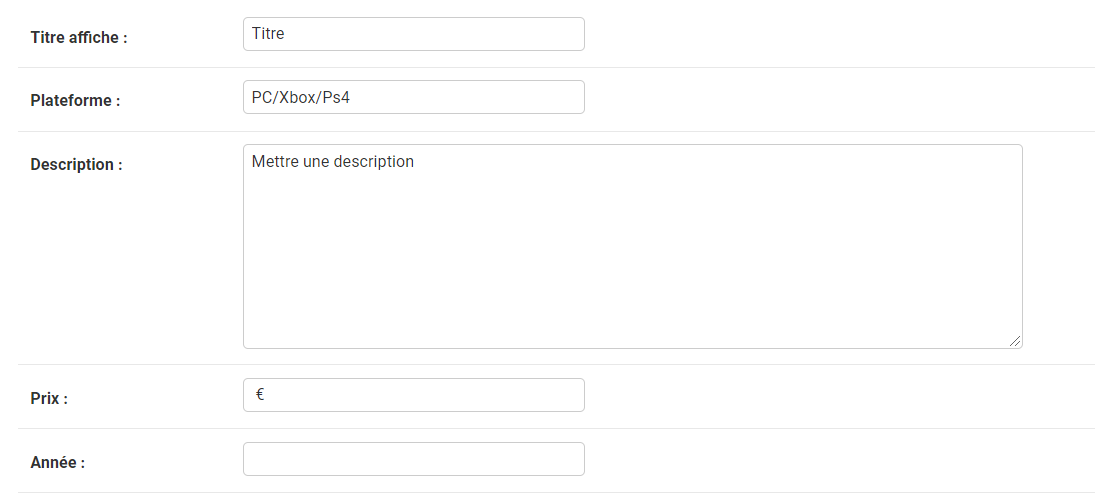

### Creation de la vue

##### Pour utiliser les données des models nous allons les mettre dans une variable dans les fichiers __views.py__.

In [ ]:
from django.shortcuts import render
from .models import affiche

def affiche(request):
    affiches = affiche.objects.all()
    data = {'affiches':affiche}
    retrun render(request, 'home/index.html', data)

Ici nous allons importer depuis modèle l'objet affiche. \
On a créé la fonction affiche :
- dans cette fonction nous avons récupéré tous les objets(les caractéristiques de tous les affiches qu'on a enregistrées) et nous l'avons mis dans la variable "affichée".
- puis tous ces objets nous le mettons dans un dictionnaire que l'on stocke dans data(données)
- enfin tout on retourne tous les requêtes HTML dans index.html et on envoie également tous les données de datèrent afin de les utiliser plus tard

C'est grace à la méthode get et filter qu'on a pu mettre en place une barre de recherche et faire de la génération de pages.

### Creation des templates

Pour les templates on les a mis dans un __dossier templates__ dans le dossier de notre application (note: chaque application a son dossier templates).\
Dans ce dossier on a mis tous nos fichiers HTML et dans un dossier spécifique qu'il faut aussi créé le dossier "static" (c'est ici que nous allons mettre nos fichiers statiques web tel que Css, Javascript, et nos images).

Pour Django il faut configurer ce dossier statique :

Dans le fichier __settings.py__ il faut dire à Django où se trouve ce fichier pour pouvoir l'utiliser, il faut rejouter si ce n'est pas déjà le cas :

Pour faire appel aux fichiers statiques dans le HTML il faut mettre en haut de la page : __{% load static %}__

Grâce à cela on va pouvoir faire appel au fichier statique comme ceci :\
    __\<link rel="stylesheet" type="text/css" href="{% static 'index.css' %}">__

Django nous donne aussi la possibilité de faire appel à d'autres pages HTML, grace à la syntaxe : __{% extends 'base.html' %}__ \
ou base.html est un fichier que l'on a créé et qui nous servira de base (en gros toute nos page HTML aura les mêmes bases, c’est-à-dire la même configuration).

Dans base.html nous pouvons créer des __block__ :

Ces "block" nous permet de changer ce qu'il y a dedans lorsque qu'on fait appel à base .html \
Nous dans notre base HTML nous avons mis la barre de navigation ainsi que le bas de page, enfin on a mis le "block" qui va contenir le contenu, ce contenu on pourra le changer pour chaque page.

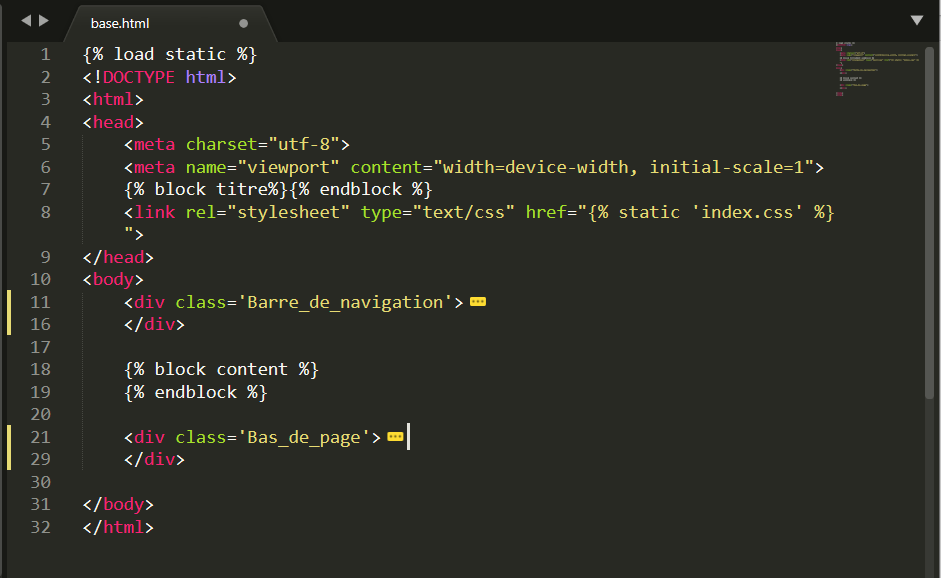

### Creation d'url

Pour cela on a créé un fichier __urls.py__ dans notre application afin de renseigner tous les urls.

In [ ]:
from django.urls import path
from .views import affiche

urlpatterns = [
    path('', affiche, name='index'),
]

Ici on indique que la page de base va faire référence à la fonction affiche que nous avons créée dans views py.

Mais pour que ça fonctionne il faut que Django ce soit ou se trouve ce fichier __urls.py__.\
Pour cela dans le répertoire de notre projet dans le fichier __Nom_du_projet/urls py__ il faut rajouter le module include(il va nous permettre d'en prendre tous les urls qu'on a renseigner dans notre application) :

In [ ]:
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', include('home.urls')),
  
] 

### En cour de développement

#### Commentaire

On a essayé de créer une application d'authentification sans succés.  Cela nous aurai permi par la suite de créer un système de commentaire.  Mais pour l'instant cette fontion est encore en développement.

##### HTML/CSS

Les codes HTML et les codes CSS ne sont pas encre achevé.

#### Deploiment du projet

Nous ne savons pas encore comment mettre notre projet en ligne afin qu'il soit accessible directement sur internet à partir d'un autre appareil.